<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [171]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [173]:
real_est = pd.read_csv("datasets/sacramento_real_estate_transactions.csv")

real_est.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [175]:
real_est.shape

(985, 12)

In [177]:
real_est.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [179]:
real_est.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [181]:
real_est.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [183]:
real_est.query('price< 0')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [185]:
#found the price < 0 and drop the 1 row out 
real_est.drop(real_est.index[real_est['price'] < 0], inplace = True)

In [187]:
real_est['beds'].value_counts()

beds
3    413
4    258
2    133
0    108
5     59
1      9
6      3
8      1
Name: count, dtype: int64

In [189]:
real_est.shape

(984, 12)

In [191]:
real_est['baths'].value_counts()

baths
2    544
1    179
3    132
0    108
4     19
5      2
Name: count, dtype: int64

In [193]:
real_est['sq__ft'].value_counts()

sq__ft
0       171
1120      8
795       6
1039      5
1080      5
       ... 
1366      1
804       1
1995      1
779       1
1319      1
Name: count, Length: 603, dtype: int64

In [195]:
#drop the 0 values from both beds or baths 0 because cannot provide the standard calculation in the  sq__ft
# 108 rows 
real_est.drop(real_est.index[(real_est['beds'] == 0 ) | (real_est['baths']== 0) ], inplace = True) 

In [197]:
real_est.shape

(876, 12)

In [199]:
real_est['sq__ft'].value_counts()

sq__ft
0       63
1120     8
795      6
1080     5
1410     5
        ..
804      1
1995     1
779      1
966      1
1319     1
Name: count, Length: 603, dtype: int64

In [201]:
real_est.groupby(['sq__ft'])['beds'].value_counts()

sq__ft  beds
0       4       23
        3       21
        5       10
        2        8
        6        1
                ..
3992    4        1
4246    5        1
4303    4        1
4400    4        1
5822    3        1
Name: count, Length: 675, dtype: int64

In [203]:
#Create imputed_sqft to calculate the sq__ft from std baths and bedroom sqft (extra research and calculate)
real_est['imputed_sqft'] = real_est.apply(
    lambda i: i['baths'] * 50 + i['beds'] * 390 if i['sq__ft'] == 0 else i['sq__ft'],
    axis=1)

In [205]:
real_est

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,imputed_sqft
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,836
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,1167
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,796
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,852
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,2280
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,1477
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,1216
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,1685


In [207]:
real_est['imputed_sqft'].describe()

count     876.000000
mean     1587.259132
std       648.444696
min       484.000000
25%      1153.500000
50%      1425.500000
75%      1839.250000
max      5822.000000
Name: imputed_sqft, dtype: float64

In [209]:
#convert Date time to a format that can use
#real_est = pd.read_csv("datasets/sacramento_real_estate_transactions.csv",index_col='sale_date',parse_dates=True)
real_est['sale_date'] = pd.to_datetime(real_est['sale_date']).tz_localize
real_est

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,imputed_sqft
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,<bound method NDFrame.tz_localize of 0 200...,59222,38.631913,-121.434879,836
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,<bound method NDFrame.tz_localize of 0 200...,68212,38.478902,-121.431028,1167
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,<bound method NDFrame.tz_localize of 0 200...,68880,38.618305,-121.443839,796
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,<bound method NDFrame.tz_localize of 0 200...,69307,38.616835,-121.439146,852
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,<bound method NDFrame.tz_localize of 0 200...,81900,38.519470,-121.435768,797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,<bound method NDFrame.tz_localize of 0 200...,232425,38.457679,-121.359620,2280
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,<bound method NDFrame.tz_localize of 0 200...,234000,38.499893,-121.458890,1477
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,<bound method NDFrame.tz_localize of 0 200...,235000,38.708824,-121.256803,1216
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,<bound method NDFrame.tz_localize of 0 200...,235301,38.417000,-121.397424,1685


In [211]:
real_est['type']

0      Residential
1      Residential
2      Residential
3      Residential
4      Residential
          ...     
980    Residential
981    Residential
982    Residential
983    Residential
984    Residential
Name: type, Length: 876, dtype: object

In [213]:
# found AC in state replace by CA and convert to int
real_est['state'] = real_est['state'].map({'CA': '1', 'AC': '1'})

In [215]:
real_est['state'].value_counts()

state
1    876
Name: count, dtype: int64

In [217]:
#Change the values of type from object to be an interger by 'Residential:0', 'Condo:1', 'Multi-Family:2', 

#real_est=real_est.replace({'Residential': 0, 'Condo': 1,'Multi-Family':2,'Unkown':3})
real_est['type'] = real_est['type'].map({'Residential': 0, 'Condo': 1,'Multi-Family':2,'Unkown':3})

In [219]:
real_est['type']= real_est['type'].astype(int)

In [221]:
real_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 984
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   street        876 non-null    object 
 1   city          876 non-null    object 
 2   zip           876 non-null    int64  
 3   state         876 non-null    object 
 4   beds          876 non-null    int64  
 5   baths         876 non-null    int64  
 6   sq__ft        876 non-null    int64  
 7   type          876 non-null    int64  
 8   sale_date     876 non-null    object 
 9   price         876 non-null    int64  
 10  latitude      876 non-null    float64
 11  longitude     876 non-null    float64
 12  imputed_sqft  876 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 95.8+ KB


In [223]:
real_est['zip'].unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95726, 95818, 95742, 95762, 95683,
       95693, 95831, 95814, 95635, 95864, 95817, 95628, 95682, 95648,
       95667, 95610, 95722, 95816, 95678, 95747, 95819, 95811, 95677,
       95765, 95603, 95661, 95650, 95821, 95623, 95663, 95746, 95619,
       95614, 95690, 95633, 95691])

In [225]:
real_est['zip'] = real_est['zip'].astype(int)

In [227]:
real_est.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,imputed_sqft
0,3526 HIGH ST,SACRAMENTO,95838,1,2,1,836,0,<bound method NDFrame.tz_localize of 0 200...,59222,38.631913,-121.434879,836
1,51 OMAHA CT,SACRAMENTO,95823,1,3,1,1167,0,<bound method NDFrame.tz_localize of 0 200...,68212,38.478902,-121.431028,1167
2,2796 BRANCH ST,SACRAMENTO,95815,1,2,1,796,0,<bound method NDFrame.tz_localize of 0 200...,68880,38.618305,-121.443839,796
3,2805 JANETTE WAY,SACRAMENTO,95815,1,2,1,852,0,<bound method NDFrame.tz_localize of 0 200...,69307,38.616835,-121.439146,852
4,6001 MCMAHON DR,SACRAMENTO,95824,1,2,1,797,0,<bound method NDFrame.tz_localize of 0 200...,81900,38.519470,-121.435768,797


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [229]:
clean_real_est = real_est[['zip','beds','baths','imputed_sqft','type','price']]

In [231]:
clean_real_est.describe()

,zip,beds,baths,imputed_sqft,type,price
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,95757.025114,3.272831,1.996575,1587.259132,0.081050,239910.925799
std,84.828280,0.861755,0.680327,648.444696,0.322925,130235.894300
min,95603.000000,1.000000,1.000000,484.000000,0.000000,1551.000000
25%,95669.250000,3.000000,2.000000,1153.500000,0.000000,150000.000000
50%,95815.000000,3.000000,2.000000,1425.500000,0.000000,215000.000000
75%,95828.000000,4.000000,2.000000,1839.250000,0.000000,297625.000000
max,95864.000000,8.000000,5.000000,5822.000000,2.000000,884790.000000


In [233]:
clean_real_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   zip           876 non-null    int64
 1   beds          876 non-null    int64
 2   baths         876 non-null    int64
 3   imputed_sqft  876 non-null    int64
 4   type          876 non-null    int64
 5   price         876 non-null    int64
dtypes: int64(6)
memory usage: 47.9 KB



When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [235]:
clean_real_est.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [39]:
# Variables qualify to use as predictor are zip beds baths sq__ft type because (Zip will show the area, 
# beds , baths , sq__ft is dimesion
# type will be used categorize the group of customer
# y is price

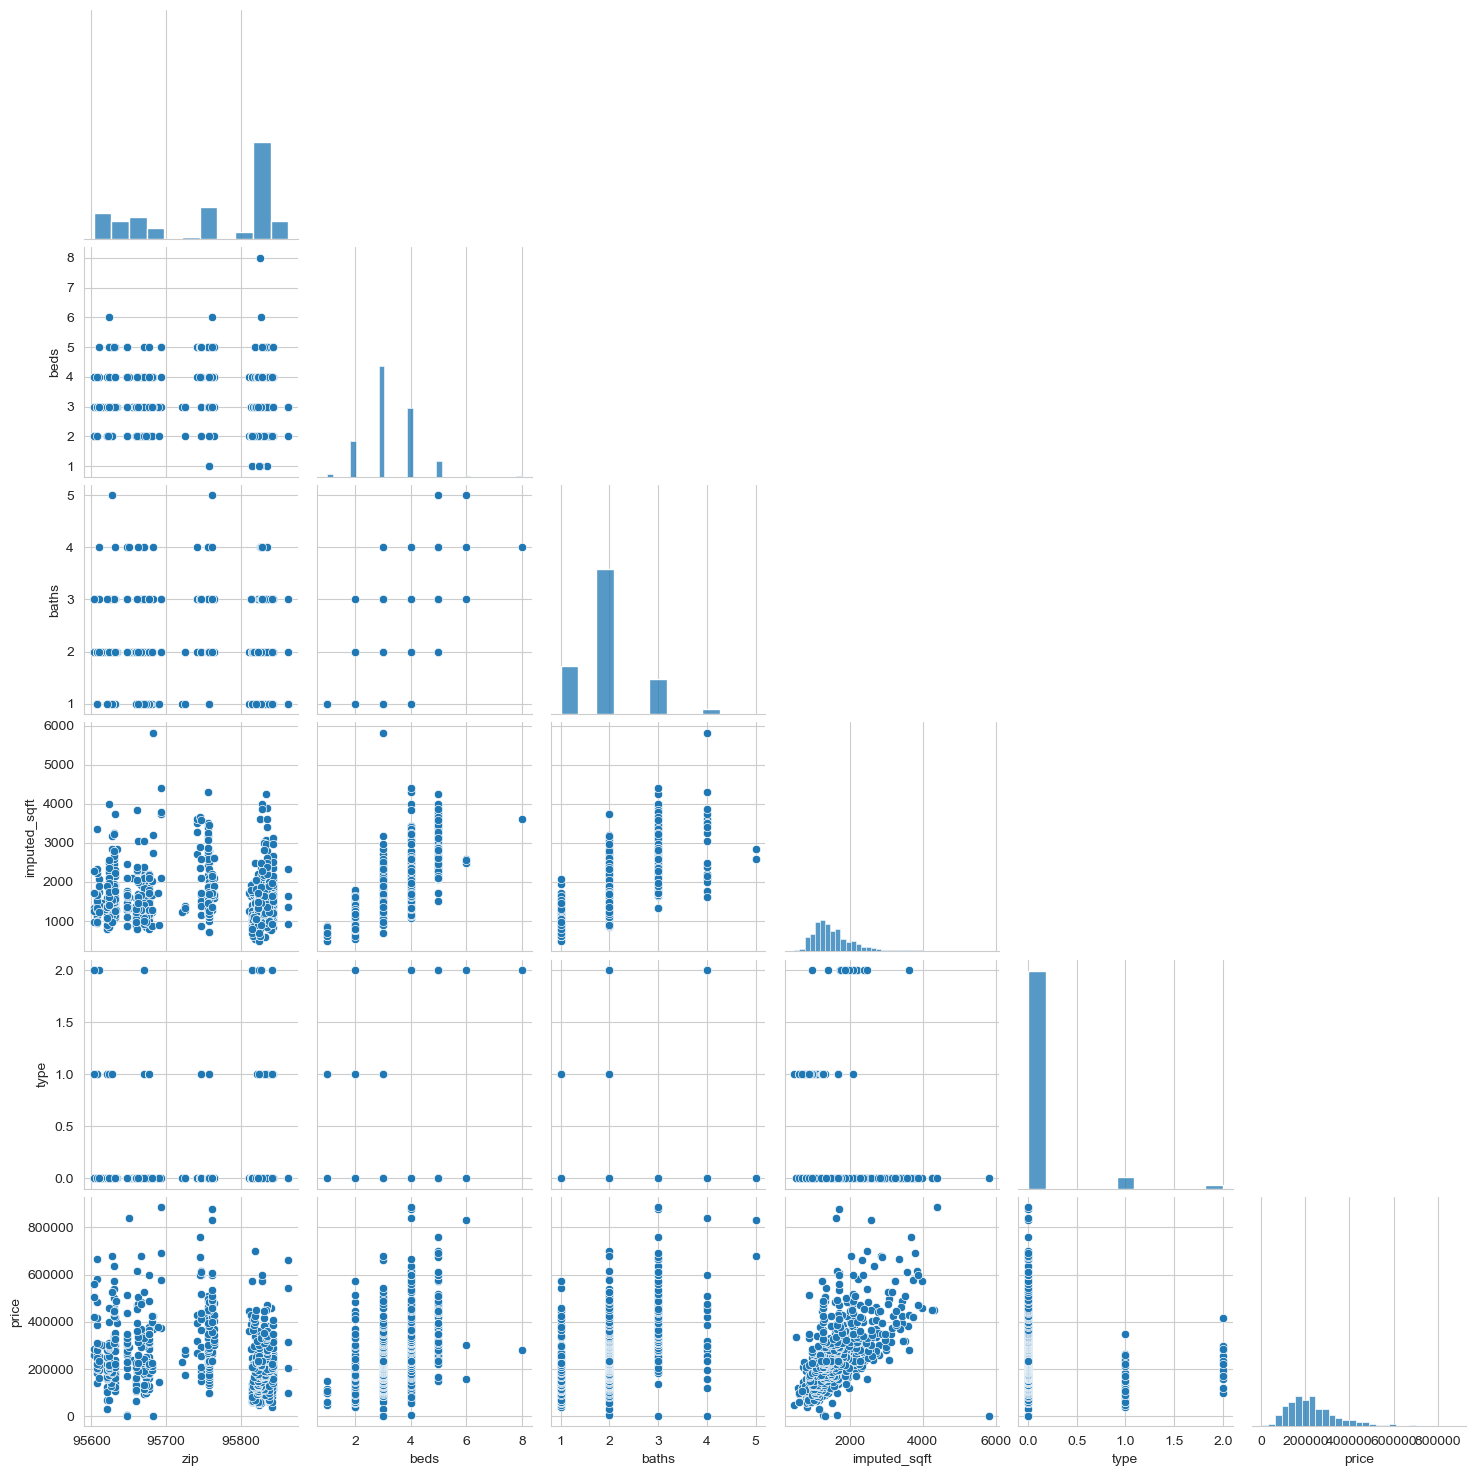

In [237]:
sns.pairplot(clean_real_est, corner=True);

In [241]:
#rcParams is default for MATLIB
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

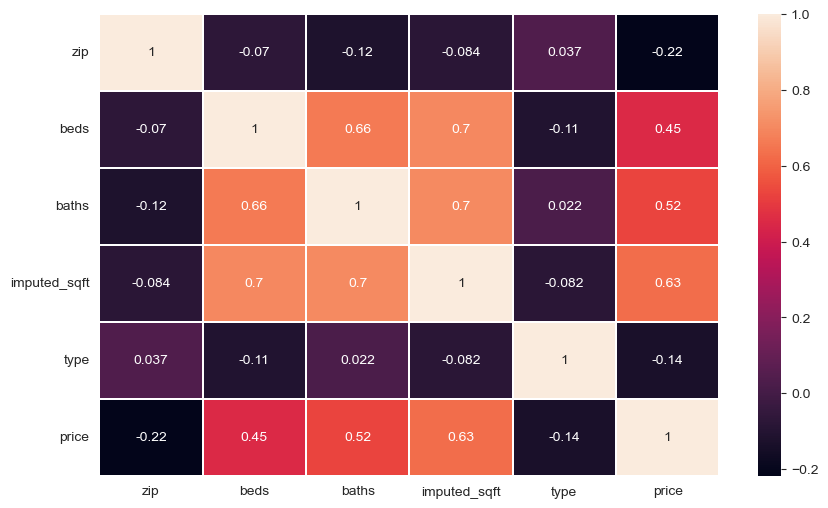

In [243]:
# Seaborn scatterplot with regression line
#sns.lmplot(x='temp',y ='total', data=bikes, aspect=1.5 , scatter_kws={'alpha' :0.2})
plt.figure(figsize=(10,6))
sns.heatmap(clean_real_est.corr(), annot = True, linewidths=0.1)
plt.yticks(rotation = 0)
plt.show()

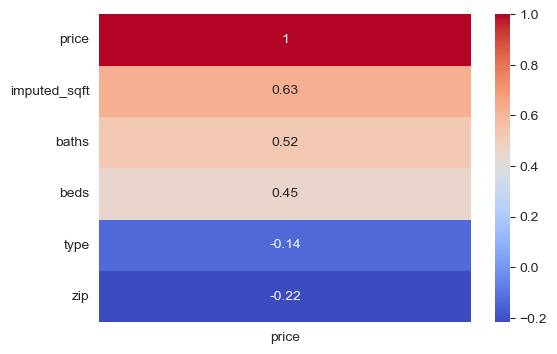

In [245]:
sns.heatmap(clean_real_est.corr()[['price']].sort_values(by='price', ascending=False), 
            # 'coolwarn; or viridis are better fo col-blindness
            cmap='coolwarm' , 
            # Set these two param so our color scale reflects the range of correlation (1 to -1)better 
            #vmax=1 ,vmin=-1 , 
            annot =True)
plt.yticks(rotation =0);

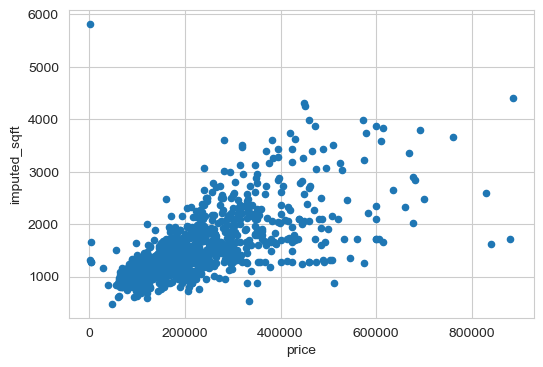

In [247]:
clean_real_est.plot(kind='scatter', x = 'price', y='imputed_sqft')
plt.show()

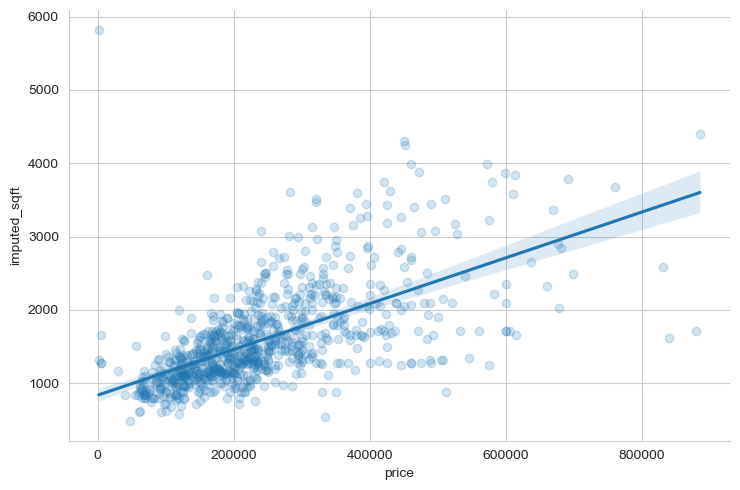

In [249]:
sns.lmplot(x='price',y ='imputed_sqft', data=clean_real_est, aspect=1.5 , scatter_kws={'alpha' :0.2})
plt.show()

In [251]:
#Default 75/25 train/test split
X = clean_real_est[['imputed_sqft']]
y = clean_real_est['price']


X_train, X_test, y_trian , y_test = train_test_split(X, y , random_state=42)

In [253]:
linreg = LinearRegression() 
linreg.fit(X,y)

LinearRegression()

In [255]:
linreg.coef_

array([125.95157665])

In [257]:
linreg.intercept_

39993.135520098964

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

In [259]:
# Imputed sqft: these columns represent the sqft values in each row. Cleaning process found zero in many rows, which some can
# imputed by beds and baths multiplied with standard sqft for the room. The imputed sq in dataset has a correlation with price. 
# Heatmaps represent it. This means if sq__ft is larger, the prices are increasing. 

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [263]:
X = clean_real_est['imputed_sqft']
y = clean_real_est['price']

def intercept_model(X, y):
    corr_Xy = X.corr(y) #correlation: clean_real_est['imputed_sqft'].corr(clean_real_est['price'])
    coefficient_x = corr_Xy *(np.std(y)/np.std(X)) #slope 
    int_c =  np.mean(y) - (coefficient_x*np.mean(X))#intercept
    return int_c , coefficient_x #print(f'coefficient on X : {coefficient_x:.4f} and intercept of the model: {int_c:.4f}')

intercept_model(X,y)

(39993.135520099546, 125.95157664909628)

### 6. Now interpret the intercept and the slope.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Predition: Model used to predict the price associated with the area in square feet that can increase $126/1 sqft.

Inference: use the model to understand the effect of square feet associated with price.

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

In [265]:
# Question #8
x = X.values  # .values changes the output from the X DataFrame to a np.ndarray

int_c, coefficient_x = intercept_model(X, y)

# Now perform the regression calculation
y_preds = int_c + coefficient_x * x

# Now assign your predictions back to your original DataFrame
clean_real_est.loc[:, 'predictions'] = y_preds
#clean_real_est['predictions'] = y_preds this show warnning require the .loc to solve issues

# Now calculate your residuals
clean_real_est.loc[:, 'residuals'] = clean_real_est['price'] - clean_real_est['predictions'] 
#this show warnning require the .loc to solve issues

# Now plot your residuals in a variety of ways (including using Seaborn's lmplot

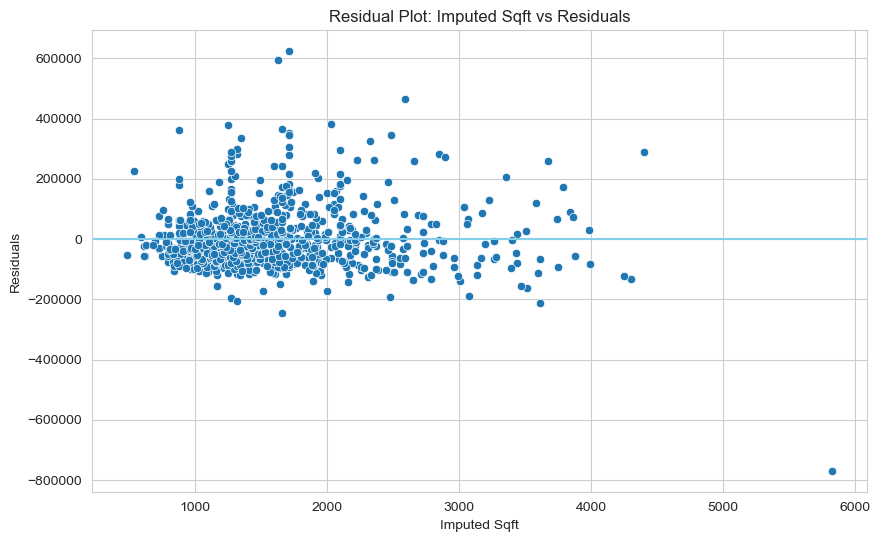

In [267]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clean_real_est['imputed_sqft'], y=clean_real_est['residuals'])
plt.axhline(color='skyblue')  
plt.title('Residual Plot: Imputed Sqft vs Residuals')
plt.xlabel('Imputed Sqft')
plt.ylabel('Residuals')
plt.show()

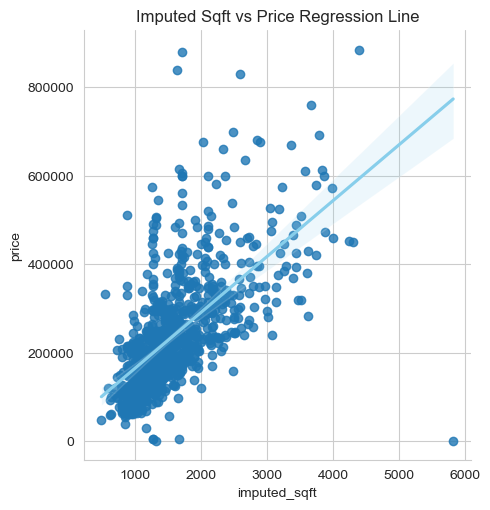

In [269]:
sns.lmplot(x='imputed_sqft', y='price', data=clean_real_est, line_kws={'color': 'skyblue'})
plt.title('Imputed Sqft vs Price Regression Line')
plt.show()

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [271]:


#real_est=real_est.replace({'Residential': 0, 'Condo': 1,'Multi-Family':2,'Unkown':3})

type_dummies = pd.get_dummies(clean_real_est['type'], prefix ='type')
type_dummies.sample(n=5, random_state=42)

,type_0,type_1,type_2
390,False,True,False
741,True,False,False
935,True,False,False
783,True,False,False
223,True,False,False


In [273]:
#Change the values of type from object to be an interger by 'Residential:0', 'Condo:1', 'Multi-Family:2', 

#real_est=real_est.replace({'Residential': 0, 'Condo': 1,'Multi-Family':2,'Unkown':3})
real_est['type'] = real_est['type'].map({'Residential': 0, 'Condo': 1,'Multi-Family':2,'Unkown':3})

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [275]:
clean_real_est = pd.concat([clean_real_est, type_dummies], axis =1)
clean_real_est.sample(n=5, random_state=42)

,zip,beds,baths,imputed_sqft,type,price,predictions,residuals,type_0,type_1,type_2
390,95747,2,2,880,1,150000,150830.522971,-830.522971,False,True,False
741,95758,3,2,1636,0,250000,246049.914918,3950.085082,True,False,False
935,95834,3,2,1428,0,188700,219851.986975,-31151.986975,True,False,False
783,95648,4,2,1660,0,306000,249072.752758,56927.247242,True,False,False
223,95682,3,1,1220,0,201000,193654.059032,7345.940968,True,False,False


In [277]:
clean_real_est.head()

,zip,beds,baths,imputed_sqft,type,price,predictions,residuals,type_0,type_1,type_2
0,95838,2,1,836,0,59222,145288.653599,-86066.653599,True,False,False
1,95823,3,1,1167,0,68212,186978.625470,-118766.625470,True,False,False
2,95815,2,1,796,0,68880,140250.590533,-71370.590533,True,False,False
3,95815,2,1,852,0,69307,147303.878825,-77996.878825,True,False,False
4,95824,2,1,797,0,81900,140376.542109,-58476.542109,True,False,False


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [279]:
feature_cols = ['beds','baths','type_0','type_1', 'type_2', 'imputed_sqft']
X = clean_real_est[feature_cols] #matrix - dataframe
y = clean_real_est['price'] #vector- series

In [281]:
model = LinearRegression()

In [283]:
model.fit(X,y)

LinearRegression()

In [285]:
list(zip(feature_cols,model.coef_))

[('beds', -5677.48836297399),
 ('baths', 38322.19935628183),
 ('type_0', 43801.39666315226),
 ('type_1', 12541.831232697363),
 ('type_2', -56343.227895850316),
 ('imputed_sqft', 102.30081945065277)]

In [287]:
model.coef_ 

array([ -5677.48836297,  38322.19935628,  43801.39666315,  12541.8312327 ,
       -56343.22789585,    102.30081945])

In [289]:
model.intercept_

-21108.114779589698

In [291]:
pd.Series(model.coef_,index=X.columns)

beds            -5677.488363
baths           38322.199356
type_0          43801.396663
type_1          12541.831233
type_2         -56343.227896
imputed_sqft      102.300819
dtype: float64

In [293]:
pd.DataFrame(model.coef_, index=X.columns,columns=['Coefficient'])

,Coefficient
beds,-5677.488363
baths,38322.199356
type_0,43801.396663
type_1,12541.831233
type_2,-56343.227896
imputed_sqft,102.300819


In [295]:
y_pred = model.predict(X)

In [297]:
y_pred[0]

135183.98957464212

In [299]:
y_pred

array([135183.98957464, 163368.07244983, 131091.95679662, 136820.80268585,
       131194.25761607, 127504.9701441 , 195245.32018072, 164391.08064434,
       152988.20954279, 199541.95459765, 175296.66038785, 214170.9717791 ,
       144442.00661839, 148329.85199059, 192534.14134875, 172732.26769676,
       136002.39613025,  99730.09054671, 109813.38635088, 221025.12668229,
       196677.53165303, 212585.51619415, 203480.74326304, 246088.8274477 ,
       174478.25383224, 193608.50706951, 142498.7052819 , 196779.83247248,
       217802.85798613, 209976.63818162, 163013.68984895, 200155.75951436,
       223480.34634911, 196472.93001413, 163013.68984895, 227367.77748823,
       192994.70215281, 227214.53337559, 193864.46623468, 101827.05022891,
       190123.40700337, 205782.30458414, 190334.88084709, 194682.45855721,
       238979.12761242, 152882.44557268, 238263.02187626, 238303.62981397,
       246037.88415451, 233403.52583582, 203838.58901458, 239286.03007077,
       231971.31436351, 2

In [301]:
X.head(1)

,beds,baths,type_0,type_1,type_2,imputed_sqft
0,2,1,True,False,False,836


### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

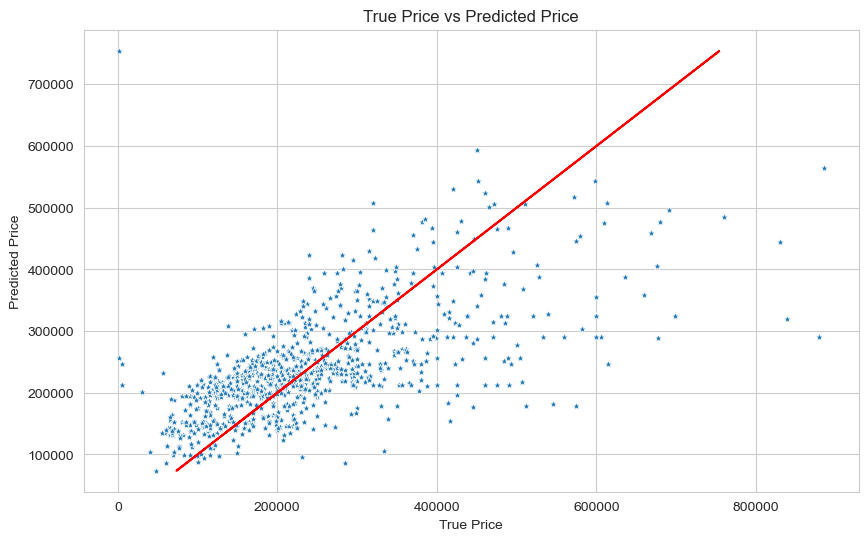

In [303]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred,marker ='*')  # True prices on x-axis, predicted prices on y-axis
plt.plot(y_pred,y_pred, color='r')
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [305]:
residuals = y - y_pred
residuals[0:5]
residuals.mean()

1.8073611607834628e-11

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

LINEM

    L - Linear relationship
    I - Independent errors
    N - Normally distributed errors
    E - Equal variance of errors (homoscedasticity)
    M - No Multicollinearity/Independence of Predictors

Simple Linear Regression (SLR) 

Lineartity : This assumption states that there should be a linear relationship 
between the independent var(X=bed, baths , type and sqft)and the dependent variable (y=price). 

Independence (of observations) - This assumes each data point is independent of the others. 
There should be NO relationship between the residuals of any two observation.

Normality (of residuals) - The residuals (difference between the observed and the predicted values) should be normally distributed

Equal variances of residuals (Homoscedasticity) - The assumption that the variance of residuals should be constant across all level of the independent variables, In other words, the spread of residuals should be roughly the same throughout the data.

No Multicollinearity occurs when two or more independent variables in a Multiple Linear Regression (MLR) model are highly correlated with each other. In these data in square feet and the number of beds and baths. These three variables are likely correlated 
If they are included in the model, the model might struggle to predic the prices

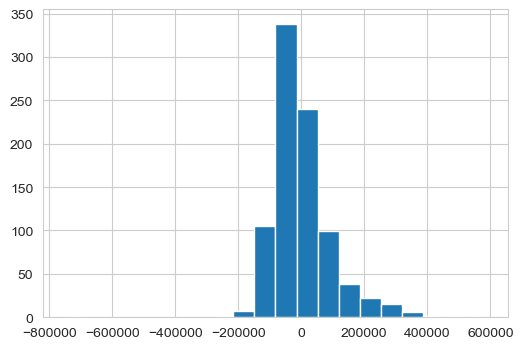

In [308]:
# N - Normality assumption 

plt.hist(residuals, bins=20)

plt.show()

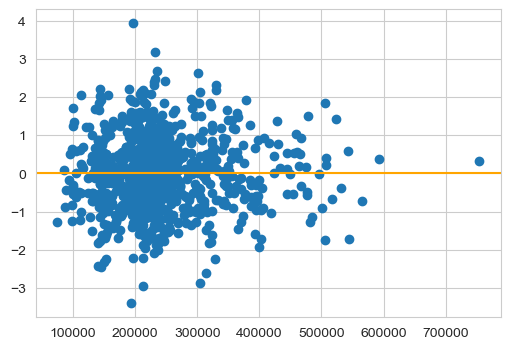

In [310]:
# Use np.random.randn to show what we expect in a residual plot
# create fake residuals

# Create fake errors/residuals to visually output how we would prefer our 
# real residuals to look like when plotted

error_fake = np.random.randn(clean_real_est.shape[0])
plt.scatter(y_pred,error_fake)
plt.axhline(0, color= 'orange')
plt.show()

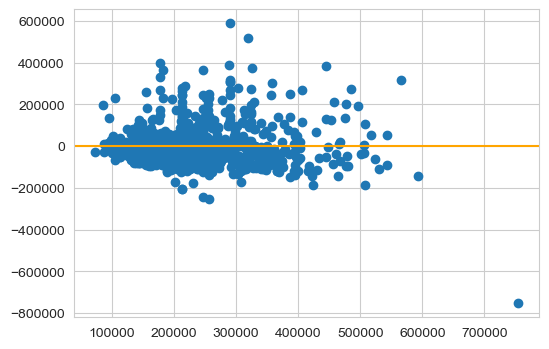

In [312]:
# Let's plot our residuals - check the L: Lineartity and E: Equal variances of residuals assumptions

plt.scatter(y_pred, residuals)
plt.axhline(0 , color='orange')
plt.show()

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

In [ ]:
L: Lineartity and E: Equal variances of residual assumptions are violated: 
L: Some patterns in the residuals are distributed. 
The plot shows clusters of points and some areas where residuals are grouped more tightly on the left, 
the other areas where they are more spread out on the right. 

E: As the predicted values increase on the x axis, the residuals start spreading out more.

Both the linearity and equal variance assumptions are violated in the model, 
as evidenced by the patterns and variability in the residuals. 
The current model may not be the best fit for your data and could lead to incorrect conclusions.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [314]:
# Prepare the data for the model
X = sm.add_constant(x)  # Add constant term for intercept
model = sm.OLS(y, X).fit()  # Fit the OLS model

# Extract the summary information
sum_df = pd.DataFrame({'Point Estimate': model.params, 'Standard Error': model.bse,'t-score': model.tvalues,
                           'p-value': model.pvalues,
                           '95% Confidence Interval Lower': model.conf_int()[0],
                           '95% Confidence Interval Upper': model.conf_int()[1]})

sum_df

,Point Estimate,Standard Error,t-score,p-value,95% Confidence Interval Lower,95% Confidence Interval Upper
const,39993.135520,9072.526470,4.408159,1.172197e-05,22186.651554,57799.619487
x1,125.951577,5.291752,23.801489,6.334624e-97,115.565550,136.337603


### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [316]:
null_predictions = y.mean()

null_residuals = y - null_predictions
null_residuals[0:5]

null_ss = (null_residuals**2).sum()
# R^2 by hand (manually)
# The formula 1 - rss / null_ss computes R².

# Calculate RSS by hand
rss = (residuals ** 2).sum()
# rss = sum of squared errors
1 - rss / null_ss

0.4185451820139954

In [318]:
metrics.r2_score(y, y_pred)

0.4185451820139954

In [320]:
# R2: The R2 of the model
# n: the number of observations
# k: the number of features or predictors variables or values in X

features = ['beds','baths','type_0','type_1', 'type_2', 'imputed_sqft']
adj_r = round(1 - (1-metrics.r2_score(y, y_pred))*(len(y)-1)/(len(y)-len(features)-1), 3)

adj_r

0.415

In [322]:
## As a function and if splitting data...
def r2_adj(y, y_pred, p):
    n = len(y)
    y_mean = np.mean(y)
    numerator = np.sum(np.square(y - y_pred)) / (n - p - 1)
    denominator = np.sum(np.square(y - y_mean)) / (n - 1)
    return 1 - numerator / denominator


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [324]:

X = clean_real_est[features] #matrix - dataframe
y = clean_real_est['price'] #vector- series

model = LinearRegression()
model.fit(X,y)
y_preds =  model.predict(X)

In [326]:
mae = metrics.mean_absolute_error(y, y_preds) #Mean Absolute Error (MSE)
print(f'Mean Absolute Error: {mae:.4f}')

mse = metrics.mean_squared_error(y, y_preds) # Mean sq error
print(f'Mean Squared Error: {mse:.4f}')

rmse =metrics.root_mean_squared_error(y, y_preds) #Root mean Sq error
print(f'Root Mean Squared Error: {rmse:.4f}')

r2 = metrics.r2_score(y,y_preds)
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 69826.4212
Mean Squared Error: 9851022556.2649
Root Mean Squared Error: 99252.3176
R-squared: 0.4185


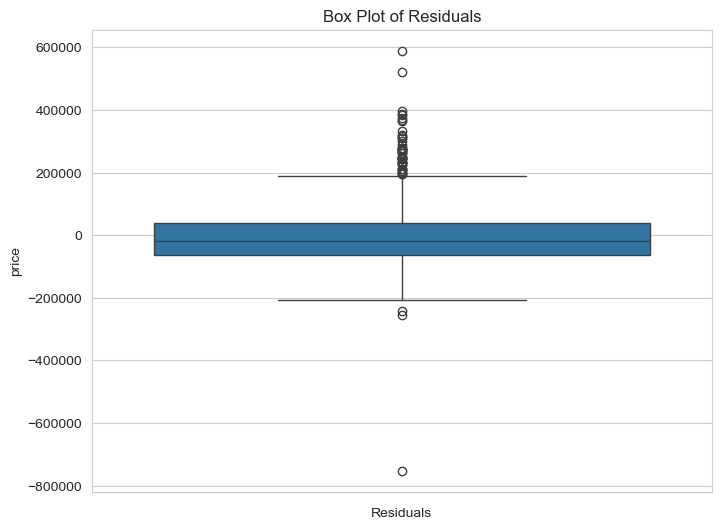

In [328]:
#Box Plot of Residuals
plt.figure(figsize=(8, 6))
sns.boxplot(residuals)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')
plt.show()

#interpret

MAE = Goal: Get MAE as close to 0 as possible; however, the result is 70308.5337; the error seems large.

MSE = goal same as MAE as close to 0, the result shows 10279221694.2068. Can be heavily affected by outliers (information from #Box Plot of Residuals)

Root mean squared error = Get as close to 0 as possible. The result is 101386.4966 is making significant prediction errors, and the high value is likely influenced by outliers. 

R-squared: 0.3933 This regression is different from others because the expected result should get as close to 1 as possible. The prices are affected by many features, so a low R2 like the model is missing important factors. 

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [330]:
#Remove Type
new_feature_cols = ['beds','baths','imputed_sqft']
new_X = clean_real_est[new_feature_cols] #matrix - dataframe
y = clean_real_est['price'] #vector- series

new_model = LinearRegression()
new_model.fit(new_X,y)
new_y_preds =  new_model.predict(new_X)

In [332]:
mae = metrics.mean_absolute_error(y, new_y_preds) #Mean Absolute Error (MSE)
print(f'Mean Absolute Error: {mae:.4f}')

mse = metrics.mean_squared_error(y, new_y_preds) # Mean sq error
print(f'Mean Squared Error: {mse:.4f}')

rmse =metrics.root_mean_squared_error(y, new_y_preds) #Root mean Sq error
print(f'Root Mean Squared Error: {rmse:.4f}')

r2 = metrics.r2_score(y,new_y_preds)
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 70329.4481
Mean Squared Error: 10035728199.6901
Root Mean Squared Error: 100178.4817
R-squared: 0.4076


In [334]:
clean_real_est

,zip,beds,baths,imputed_sqft,type,price,predictions,residuals,type_0,type_1,type_2
0,95838,2,1,836,0,59222,145288.653599,-86066.653599,True,False,False
1,95823,3,1,1167,0,68212,186978.625470,-118766.625470,True,False,False
2,95815,2,1,796,0,68880,140250.590533,-71370.590533,True,False,False
3,95815,2,1,852,0,69307,147303.878825,-77996.878825,True,False,False
4,95824,2,1,797,0,81900,140376.542109,-58476.542109,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
980,95829,4,3,2280,0,232425,327162.730280,-94737.730280,True,False,False
981,95823,3,2,1477,0,234000,226023.614231,7976.385769,True,False,False
982,95610,3,2,1216,0,235000,193150.252725,41849.747275,True,False,False
983,95758,4,2,1685,0,235301,252221.542174,-16920.542174,True,False,False


# Remove Type

Adjusted model has slightly improved overall:

The MSE and RMSE have decreased, which means the model is handling larger errors better.
The R-squared has increased, meaning the model explains more of the variation in the data, which points to an increase in predictive power.
The MAE is almost the same as before, so remains stable.

In [336]:
# Remove all bed , bath add the zipcode to predict
zip_feature_cols = ['zip','imputed_sqft']
zip_X = clean_real_est[zip_feature_cols] #matrix - dataframe
y = clean_real_est['price'] #vector- series

zip_model = LinearRegression()
zip_model.fit(zip_X,y)
zip_y_preds =  zip_model.predict(zip_X)

In [340]:
mae = metrics.mean_absolute_error(y, zip_y_preds) #Mean Absolute Error (MSE)
print(f'Mean Absolute Error: {mae:.4f}')

mse = metrics.mean_squared_error(y, zip_y_preds) # Mean sq error
print(f'Mean Squared Error: {mse:.4f}')

rmse =metrics.root_mean_squared_error(y, zip_y_preds) #Root mean Sq error
print(f'Root Mean Squared Error: {rmse:.4f}')

r2 = metrics.r2_score(y,zip_y_preds)
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 67638.1314
Mean Squared Error: 9814448428.8731
Root Mean Squared Error: 99067.8981
R-squared: 0.4207


#interpret 
The decreases in MAE, MSE, and RMSE reflect that the model is making more accurate predictions. 
especially by better managing larger errors. 
The increase in R² shows that the model now captures slightly more of the variance in prices.
It can be said ZIP code and sq ft make better predictions on prices.

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

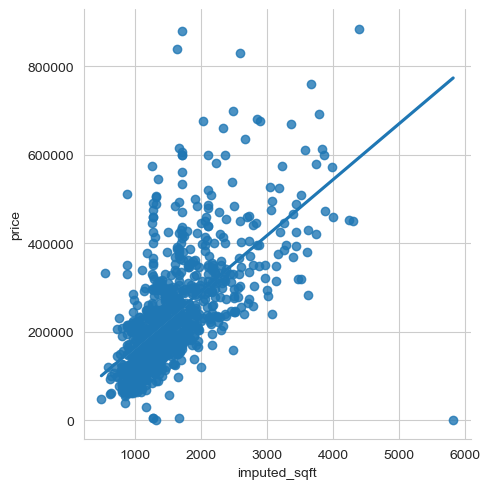

In [342]:
# plot the data
# ci=False      --> Don't show confidence band
# fit_reg=False --> Don't show regression line

sns.lmplot(x='imputed_sqft', y='price' ,data= clean_real_est,ci= False , fit_reg = True)
plt.show()

#example underfit data

In [344]:
# Randomly assign every observation to either universe 1 or universe 2.
np.random.seed(12345)

clean_real_est['universe'] = np.random.randint(1,3, len(clean_real_est))

In [346]:
clean_real_est['universe'].value_counts()

universe
2    449
1    427
Name: count, dtype: int64

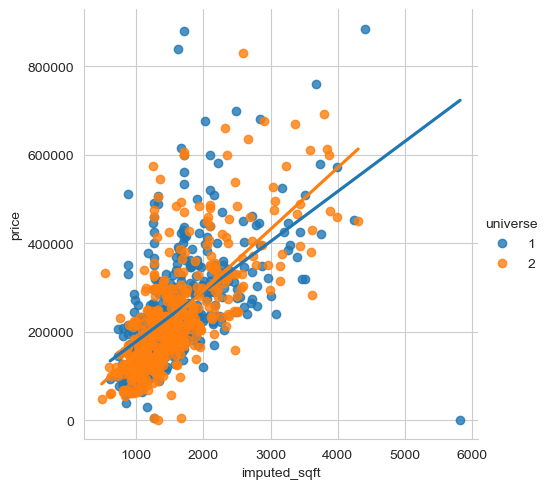

In [348]:
sns.lmplot(x='imputed_sqft' , y='price', data=clean_real_est , hue ='universe',ci=False)
plt.show()

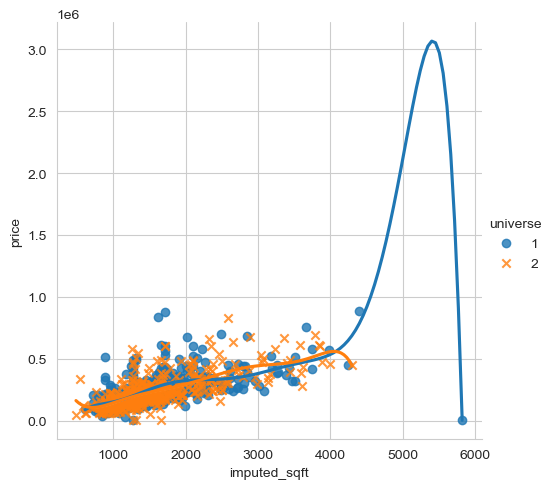

In [350]:
import warnings 
warnings.simplefilter('ignore')

sns.lmplot(x = 'imputed_sqft' , y = 'price', data=clean_real_est, hue='universe' , ci=False, markers=['o','x'], order=8)
plt.show()


I believe my model might be experiencing high bias; it is likely underfitting the data. 
The model isn’t capturing the relationships between selected features, including bed, baht, and sq ft. It improved the 
result when change to zip code and sq ft, however, it is not nearly expected in each regression model.